In [233]:
import pandas as pd

In [234]:
csv_lloguers = r'C:\Users\34644\Desktop\JUMP2DIGITAL HACKHATHO\2017_lloguer_preu_trim.csv'
lloguers = pd.read_csv(csv_lloguers)

El conjunt de dades conté informació sobre el lloguer mitjà mensual ("Lloguer_mitja") en diversos districtes ("Nom_Districte") i barris ("Nom_Barri") per a l'any 2017, desglossat per trimestres ("Trimestre")

Per coneixer millor les dades utilizem .info() que ens diu per cada columna el tipo de dada i si la columna conte algun valor buit. Ens donem conte que a la columna Preu hi han algunes files que no en tenen. 

In [235]:
lloguers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


In [236]:
# Per saber una mica mes de les dades, miro el numero de elements diferents que hi ha a cada columna
# I observo que al lloguer mitja tenim 2 valors diferents.
lloguers.apply(lambda x: x.unique().__len__())

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         73
Nom_Barri          73
Lloguer_mitja       2
Preu              505
dtype: int64

In [237]:
# En la columna del lloguer tenim informacio del lloguer mitjà mensual i per superficie.
lloguers['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [238]:
# Per exemple pel Raval, tenim la informacio del lloguer mitja mensual i per superficie per trimestre.
lloguers[lloguers['Nom_Barri'] == 'el Clot'][['Trimestre', 'Nom_Barri', 'Lloguer_mitja', 'Preu']]

,Trimestre,Nom_Barri,Lloguer_mitja,Preu
64,1,el Clot,Lloguer mitjà mensual (Euros/mes),774.97
137,2,el Clot,Lloguer mitjà mensual (Euros/mes),740.91
210,3,el Clot,Lloguer mitjà mensual (Euros/mes),775.27
283,4,el Clot,Lloguer mitjà mensual (Euros/mes),777.21
356,1,el Clot,Lloguer mitjà per superfície (Euros/m2 mes),12.26
429,2,el Clot,Lloguer mitjà per superfície (Euros/m2 mes),12.28
502,3,el Clot,Lloguer mitjà per superfície (Euros/m2 mes),12.72
575,4,el Clot,Lloguer mitjà per superfície (Euros/m2 mes),12.47


Saben aixo dividirem les dades en base al lloguer mitja mensual i al preu per metre quadrat

In [239]:
# group the data based on the values of the 'column_name' column
lloguer_mensual = lloguers[lloguers['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].reset_index()
lloguer_m2      = lloguers[lloguers['Lloguer_mitja'] != 'Lloguer mitjà mensual (Euros/mes)'].reset_index()

In [240]:
# Mateix numero de files
print(lloguer_mensual.shape)
print(lloguer_m2.shape)

(292, 9)
(292, 9)


Si ens fixem el barris que no tenen el preu del lloguer mensual tampoc tenen el preu del metre quadrat

In [241]:
# Obtenim els indexs de les files que no tenen informacio del preu
nan_index_m2 = lloguer_m2[lloguer_m2['Preu'].isna()].index
nan_index_lloguer = lloguer_mensual[lloguer_mensual['Preu'].isna()].index
# Si els indexs son iguals, es que es tracta de les mateixes files i per tant del mateix barri
# all() retorna True si tots els elements del iterable son True volen dir que son iguals
all(nan_index_m2 == nan_index_lloguer)

True

In [242]:
# Comprovem que ja no tenim valors nuls
print("Valors nuls lloguer mensual -> {} \tValors nuls lloguer m2 -> {}"
      .format(lloguer_mensual.isna().sum().sum(), lloguer_m2.isna().sum().sum()))

Valors nuls lloguer mensual -> 19 	Valors nuls lloguer m2 -> 19


Per tal de tracta amb aquestes files que no tenen preu, tenim varies opcions:
- Borrar i perdre la informacio
- En base el trimestre, agafar els preus dels barris que estan al mateix districte i fer la mitja

In [243]:
def actualiza_preus(df):
    def get_mean_price(df, trimestre, districte):
        # Agroupem per trimestre i per districte i obtenim la mitjana del preu per cada districte en cada trimestre
        return df.groupby(['Trimestre', 'Nom_Districte'])['Preu'].mean().loc[trimestre, districte]

    # Obtenim els indexs de les files que no tenen informacio del preu
    Trimestre = df[df['Preu'].isna()]['Trimestre'].values
    districte = df[df['Preu'].isna()]['Nom_Districte'].values

    # Obtenim els nous preus
    nous_preus = []
    for trime, distr in zip(Trimestre, districte):
        # Iterem per cada fila que no te informacio del preu i trobem el preu mitja per aquell districte i trimestre
        nous_preus.append(get_mean_price(df, trime, distr))
    return nous_preus

# Actualitzem els preus
lloguer_mensual.loc[lloguer_mensual['Preu'].isna(), 'Preu'] = actualiza_preus(lloguer_mensual)
lloguer_m2.loc[lloguer_m2['Preu'].isna(), 'Preu'] = actualiza_preus(lloguer_m2)

In [244]:
# Comprovem que ja no tenim valors nuls
print("Valors nuls lloguer mensual -> {} \tValors nuls lloguer m2 -> {}"
      .format(lloguer_mensual.isna().sum().sum(), lloguer_m2.isna().sum().sum()))

Valors nuls lloguer mensual -> 0 	Valors nuls lloguer m2 -> 0


In [246]:
# Un cop tenim les dades actualitzades
# Afegim el lloguer m2 al dataframe del lloguer mensual
lloguer_mensual['Lloguer_mitja_m2'] = lloguer_m2['Preu']
# Renombrem la columna del lloguer mitja mensual
new = lloguer_mensual.rename({'Preu': 'Lloguer_mitja_mensual'}, axis = 1)
# Eliminem les columnes que no ens interessen
llogues_bcn = new.drop(['index', 'Lloguer_mitja'], axis =1)
llogues_bcn_mitja_any = llogues_bcn.drop(['Trimestre'], axis = 1)

In [249]:
# Ara tenim dataframe amb la informacio del lloguer mitja mensual i per superficie per barri
# A la seguent cela es mostre que ancara tenim informacio de cada barri per semestre, per aixo apareix 4 cops.
llogues_bcn_mitja_any[llogues_bcn_mitja_any['Nom_Barri'] == 'el Raval']
# El que farem ara sera tenir la mitjana anual del lloguer i el m2 per barri

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_mensual,Lloguer_mitja_m2
0,2017,1,Ciutat Vella,1,el Raval,734.99,13.50
73,2017,1,Ciutat Vella,1,el Raval,714.29,13.69
146,2017,1,Ciutat Vella,1,el Raval,764.85,13.97
219,2017,1,Ciutat Vella,1,el Raval,776.73,14.42


In [250]:
# Assuming 'llogues_bcn_mitja_any' is your DataFrame and it's already imported into your environment
llogues_bcn_mitja_any['Lloguer_mitja_mensual'] = llogues_bcn_mitja_any.groupby('Nom_Barri')['Lloguer_mitja_mensual'].transform('mean')
llogues_bcn_mitja_any['Lloguer_mitja_m2'] = llogues_bcn_mitja_any.groupby('Nom_Barri')['Lloguer_mitja_m2'].transform('mean')

In [251]:
# Borrem els duplicats
llogues_bcn_mitja_any.drop_duplicates(subset=['Nom_Barri'], inplace=True)


In [257]:
llogues_bcn_mitja_any

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_mensual,Lloguer_mitja_m2
20,2017,4,Les Corts,21,Pedralbes,1785.88,16.14
23,2017,5,Sarrià-Sant Gervasi,24,les Tres Torres,1627.20,16.83
22,2017,5,Sarrià-Sant Gervasi,23,Sarrià,1353.54,17.45
25,2017,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,1312.36,14.60
66,2017,10,Sant Martí,67,la Vila Olímpica del Poblenou,1248.27,17.10
...,...,...,...,...,...,...,...
49,2017,8,Nou Barris,50,les Roquetes,534.00,10.15
55,2017,8,Nou Barris,56,Vallbona,521.14,8.55
56,2017,9,Sant Andreu,57,la Trinitat Vella,500.25,9.23
53,2017,8,Nou Barris,54,Torre Baró,470.58,7.72


In [260]:
# Aquest nou dataset conte el lloguer mitja mensual i per superficie per barri durant el 2017
llogues_bcn_mitja_any
# Arodonir els valors de lloguer mensual i per superficie
llogues_bcn_mitja_any['Lloguer_mitja_mensual'] = llogues_bcn_mitja_any['Lloguer_mitja_mensual'].round(2)
llogues_bcn_mitja_any['Lloguer_mitja_m2'] = llogues_bcn_mitja_any['Lloguer_mitja_m2'].round(2)

#sort by lloguer_mitja_mensual
llogues_bcn_mitja_any.sort_values(by=['Lloguer_mitja_mensual'], inplace=True, ascending=False)
llogues_bcn_mitja_any
# Do a bar plot of the prices of the top10 districts, put the same color for the same district
# Plot the prices of the top10 districts in a bar plot, put the same color for the same disctirct
import matplotlib.pyplot as plt
import numpy as np


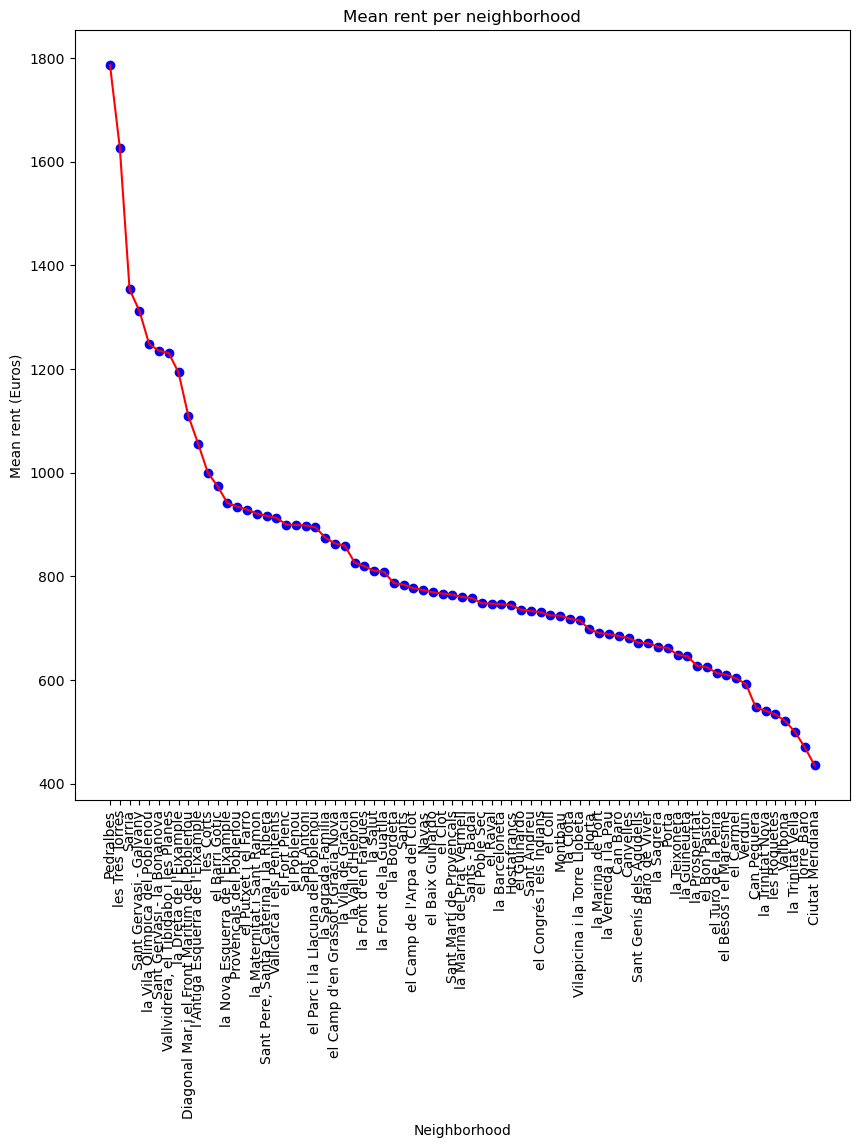

In [270]:
import matplotlib.pyplot as plt
import numpy as np

# Aquest nou dataset conte el lloguer mitja mensual i per superficie per barri durant el 2017
llogues_bcn_mitja_any

# Arodonir els valors de lloguer mensual i per superficie
llogues_bcn_mitja_any['Lloguer_mitja_mensual'] = llogues_bcn_mitja_any['Lloguer_mitja_mensual'].round(2)
llogues_bcn_mitja_any['Lloguer_mitja_m2'] = llogues_bcn_mitja_any['Lloguer_mitja_m2'].round(2)

# sort by lloguer_mitja_mensual
llogues_bcn_mitja_any.sort_values(by=['Lloguer_mitja_mensual'], inplace=True, ascending=False)

# create a scatter plot with a line segment connecting the points
fig, ax = plt.subplots(figsize=(10, 10))

# plot the points
ax.scatter(llogues_bcn_mitja_any['Nom_Barri'], llogues_bcn_mitja_any['Lloguer_mitja_mensual'], color='blue')

# plot the line segment connecting the points
x = np.arange(len(llogues_bcn_mitja_any))
y = llogues_bcn_mitja_any['Lloguer_mitja_mensual']
ax.plot(x, y, color='red')

# set the title and axis labels
ax.set_title('Mean rent per neighborhood')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Mean rent (Euros)')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# show the plot
plt.show()


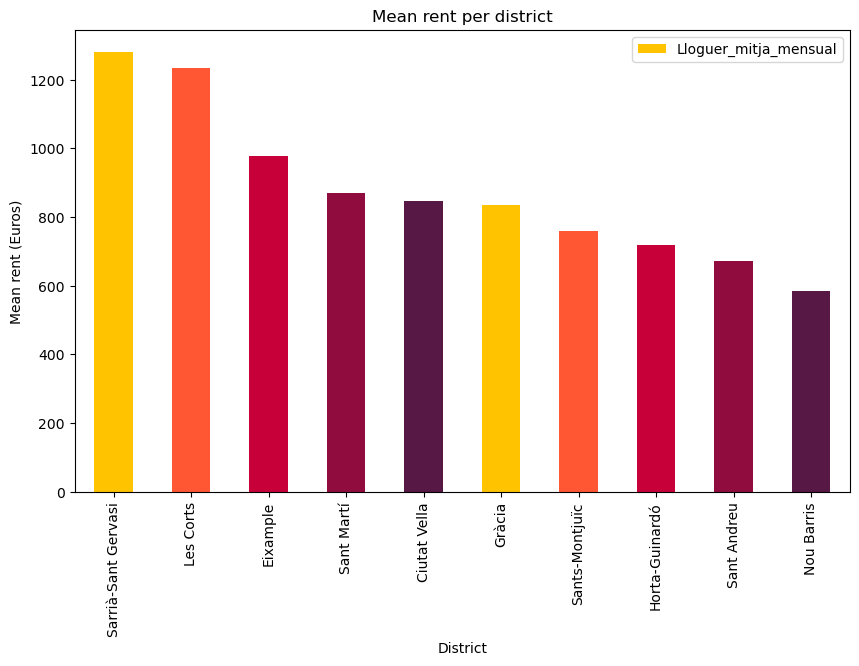

In [266]:
# sort the mean rent by district in descending order
mean_rent_by_district = llogues_bcn_mitja_any.groupby('Nom_Districte')['Lloguer_mitja_mensual'].mean().sort_values(ascending=False)

# set the figure size
plt.figure(figsize=(10, 6))

# plot the bar chart with sorted mean rent and legend
ax = mean_rent_by_district.plot(kind='bar', color=['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845'])
ax.legend()

# set the title and axis labels
ax.set_title('Mean rent per district')
ax.set_xlabel('District')
ax.set_ylabel('Mean rent (Euros)')

# show the plot
plt.show()

# SOROLL BCN

El conjunt de dades proporcionat conté informació detallada sobre l'exposició al soroll i els preus de lloguer en diversos barris de Barcelona. Inclou identificadors de districte i barri, noms, una columna de concepte que classifica els tipus de soroll segons la font i el moment del dia, rangs de soroll en decibels, i dades de lloguer tant mensuals com per metre quadrat. Aquesta informació pot ser utilitzada per investigadors o urbanistes per a entendre millor la dinàmica urbana de la ciutat.

In [387]:
import pandas as pd
dataset_sorroll = r'C:\Users\34644\Desktop\JUMP2DIGITAL HACKHATHO\2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv'
sorroll = pd.read_csv(dataset_sorroll)

Processament de les dades

In [388]:
print("Numero de nuls al dataset -> {}".format(sorroll.isna().sum().sum()))

Numero de nuls al dataset -> 0


In [389]:
# Pasant els percentatges de strinsg a floats
sorroll['Valor'] = sorroll['Valor'].str.replace('%', '').astype(float)

In [390]:
llogues_bcn_mitja_any['Lloguer_mitja_mensual'].index = llogues_bcn_mitja_any['Nom_Barri']
llogues_bcn_mitja_any['Lloguer_mitja_m2'].index = llogues_bcn_mitja_any['Nom_Barri']

# Afegint dos columnes al dataset del soroll. Lloger_mita_mensual i Lloguer_mitja_m2.
# Aquestes columnes contenen la informacio del lloguer mitja mensual i per superficie per barris.
# La informacio se repetira perque els barris apareixen mes de un cop. Pero aixi ens assegurem de tenir tota
# la informacio en un mateix dataset.
sorroll['Lloguer_mitja_mensual'] = sorroll['Nom_Barri'].map(llogues_bcn_mitja_any['Lloguer_mitja_mensual'])
sorroll['Lloguer_mitja_m2'] = sorroll['Nom_Barri'].map(llogues_bcn_mitja_any['Lloguer_mitja_m2'])

In [391]:
Rang_sorroll = sorroll['Rang_soroll'].unique()
Concepte     = sorroll['Concepte'].unique()

# Creem un diccionari per poder convertir els valors de la columna Rang_soroll i Concepte a numeros
Rang_soroll2numb = dict(zip(Rang_sorroll, range(len(Rang_sorroll))))
concepte2numb = dict(zip(Concepte, range(len(Concepte))))

In [392]:
# Sorrol numeric conte informacio numerica dels soroll, lloguer mitja mensual i per superficie de Barcelona.
sorroll_numeric = (sorroll
           .assign(Concepte=sorroll['Concepte'].map(concepte2numb))
           .assign(Rang_soroll=sorroll['Rang_soroll'].map(Rang_soroll2numb))
           .drop(['Nom_Barri', 'Nom_Districte'], axis=1))

Dos datasets. Un que utilizarem per fer plots. I el altre que l'utilizarem per fer la reduccio de les dimensions

In [292]:
sorroll_numeric.head(2)

,Codi_Districte,Codi_Barri,Concepte,Rang_soroll,Valor,Lloguer_mitja_mensual,Lloguer_mitja_m2
0,1,1,0,0,7.73,747.72,13.9
1,1,1,0,1,26.98,747.72,13.9


In [393]:
sorroll.head(2)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor,Lloguer_mitja_mensual,Lloguer_mitja_m2
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73,747.72,13.9
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98,747.72,13.9


Reduccio de les dimensions. PCA (Princiapl Component Analyisis)

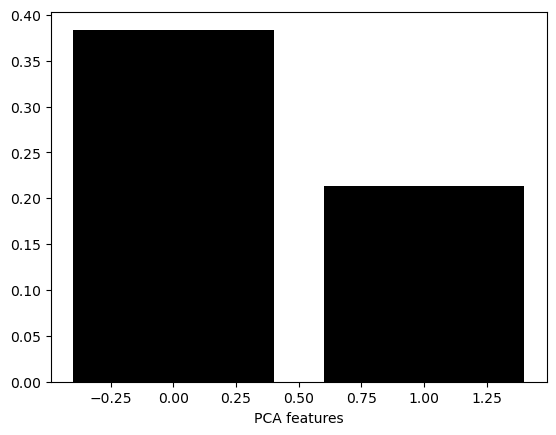

In [306]:
# Principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(sorroll_numeric)

# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')

plt.xlabel('PCA features')
plt.show()


In [646]:
corr_matrix = sorroll.groupby(['Concepte', 'Rang_soroll'])[['Valor', 'Lloguer_mitja_mensual', 'Lloguer_mitja_m2']].corr().abs()

corr_matrix.replace(1, 0, inplace=True)
corr_matrix

Valor  Lloguer_mitja_mensual  \
Concepte   Rang_soroll                                                          
FFCC_D     40-45 dB    Valor                  0.000000               0.133088   
                       Lloguer_mitja_mensual  0.133088               0.000000   
                       Lloguer_mitja_m2       0.210098               0.773251   
           45-50 dB    Valor                  0.000000               0.148816   
                       Lloguer_mitja_mensual  0.148816               0.000000   
...                                                ...                    ...   
VIANANTS_E <40 dB      Lloguer_mitja_mensual  0.003623               0.000000   
                       Lloguer_mitja_m2       0.239299               0.773251   
           >=80 dB     Valor                       NaN                    NaN   
                       Lloguer_mitja_mensual       NaN               0.000000   
                       Lloguer_mitja_m2            NaN               0.773251   

                                              Lloguer_mitja_m2  
Concepte   Rang_soroll                                          
FFCC_D     40-45 dB    Valor                          0.210098  
                       Lloguer_mitja_mensual          0.773251  
                       Lloguer_mitja_m2               0.000000  
           45-50 dB    Valor                          0.252846  
                       Lloguer_mitja_mensual          0.773251  
...                                                        ...  
VIANANTS_E <40 dB      Lloguer_mitja_mensual          0.773251  
                       Lloguer_mitja_m2               0.000000  
           >=80 dB     Valor                               NaN  
                       Lloguer_mitja_mensual          0.773251  
                       Lloguer_mitja_m2               0.000000  

[780 rows x 3 columns]

In [651]:
corr_matrix.sort_values(by=['Valor'], ascending=False)

Valor  Lloguer_mitja_mensual  \
Concepte   Rang_soroll                                                          
OCI_N      40-45 dB    Lloguer_mitja_m2       0.395422               0.773251   
FFCC_DEN   60-65 dB    Lloguer_mitja_m2       0.391096               0.773251   
FFCC_D     60-65 dB    Lloguer_mitja_m2       0.376221               0.773251   
OCI_N      45-50 dB    Lloguer_mitja_m2       0.369038               0.773251   
FFCC_E     60-65 dB    Lloguer_mitja_m2       0.367863               0.773251   
...                                                ...                    ...   
VIANANTS_E 75-80 dB    Lloguer_mitja_mensual       NaN               0.000000   
                       Lloguer_mitja_m2            NaN               0.773251   
           >=80 dB     Valor                       NaN                    NaN   
                       Lloguer_mitja_mensual       NaN               0.000000   
                       Lloguer_mitja_m2            NaN               0.773251   

                                              Lloguer_mitja_m2  
Concepte   Rang_soroll                                          
OCI_N      40-45 dB    Lloguer_mitja_m2               0.000000  
FFCC_DEN   60-65 dB    Lloguer_mitja_m2               0.000000  
FFCC_D     60-65 dB    Lloguer_mitja_m2               0.000000  
OCI_N      45-50 dB    Lloguer_mitja_m2               0.000000  
FFCC_E     60-65 dB    Lloguer_mitja_m2               0.000000  
...                                                        ...  
VIANANTS_E 75-80 dB    Lloguer_mitja_mensual          0.773251  
                       Lloguer_mitja_m2               0.000000  
           >=80 dB     Valor                               NaN  
                       Lloguer_mitja_mensual          0.773251  
                       Lloguer_mitja_m2               0.000000  

[780 rows x 3 columns]

In [652]:
def concepte_soroll_barri():
    groupby = sorroll.groupby(['Nom_Barri', 'Rang_soroll'])
    indices = []
    barris = {barri : {} for barri in sorroll['Nom_Barri'].unique()}
    for key, df in groupby:
        i = df.index[np.where(df['Valor'].values == df['Valor'].max())]
        barris[key[0]][key[1]] = sorroll.iloc[i, :]['Concepte'].values
        
    return barris

indices = concepte_soroll_barri()

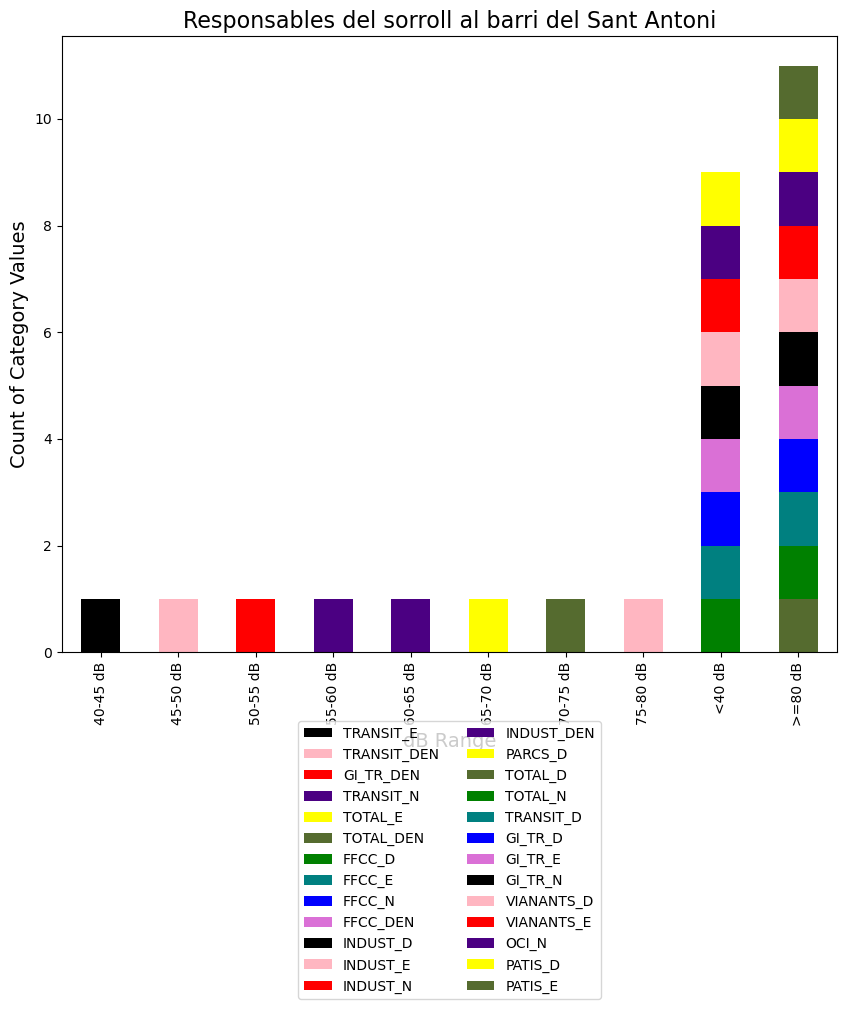

In [730]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Given dictionary

barri = sorroll['Nom_Barri'].unique()[9]
data = indices[barri]

# Convert the dictionary to a DataFrame suitable for a stacked bar chart
# We create an empty DataFrame first
df = pd.DataFrame()

# We will iterate through each dB category and count the occurrences of each category value
for key, values in data.items():
    for value in values:
        # Increment the count for (dB category, value) in the DataFrame
        if value in df:
            df.at[key, value] = df.at[key, value] + 1 if key in df.index else 1
        else:
            df.at[key, value] = 1

# Replace NaN with 0
df.fillna(0, inplace=True)

# Define a color palette with more colors
colors = [mcolors.CSS4_COLORS[color] for color in['black', 'lightpink', 'red', 'indigo', 'yellow', 'darkolivegreen', 'green', 'teal', 'blue', 'orchid', ]]

# Plotting the DataFrame as a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the title and axis labels
ax.set_title('Responsables del sorroll al barri del {}'.format(barri), fontsize=16)
ax.set_xlabel('dB Range', fontsize=14)
ax.set_ylabel('Count of Category Values', fontsize=14)

# Set the legend to two columns
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Show the plot
plt.show()


Principal component analysis

In [735]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(sorroll_numeric)

# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
